In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.insert(0,"x0",1)
data

,x0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,1,8,183,64,0,0,23.3,0.672,32,1
3,1,1,89,66,23,94,28.1,0.167,21,0
4,1,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,1,10,101,76,48,180,32.9,0.171,63,0
764,1,2,122,70,27,0,36.8,0.340,27,0
765,1,5,121,72,23,112,26.2,0.245,30,0
766,1,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X=data.iloc[:,:9].values
Y=data.iloc[:,-1].values

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [7]:
temp = X_train[1]
temp.shape

(9,)

In [42]:
Y_train[0].reshape((-1,1)).shape

(1, 1)

In [81]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def fit(x,y,epochs=200,learning_rate=0.0001):
    ##initialize w
    w=np.zeros((x.shape[1],1))
    l=[]
    for j in range(epochs):
        loss=0.0
        grad=0.0
        for i in range(x.shape[0]):
            a=x[i]
            a=a.reshape((-1,1))
            z = np.dot((a.T),w)
            phi_z=sigmoid(z)
#             print(phi_z.shape, z.shape, a.shape, w.shape,y[i].shape)
            if(phi_z>0.5):
                y_pred=1
            else:
                y_pred=0
            loss+=y[i]*math.log(phi_z+1e-8)+(1-y[i])*math.log(1-phi_z+1e-8)
            grad+=(phi_z-y[i].reshape((-1,1)))*x[i]
        l.append(-1*loss/x.shape[0])
        ###update w
        w= w-learning_rate*grad.T/x.shape[0]
    return l
        

        

In [82]:
ll=fit(X_train,Y_train)

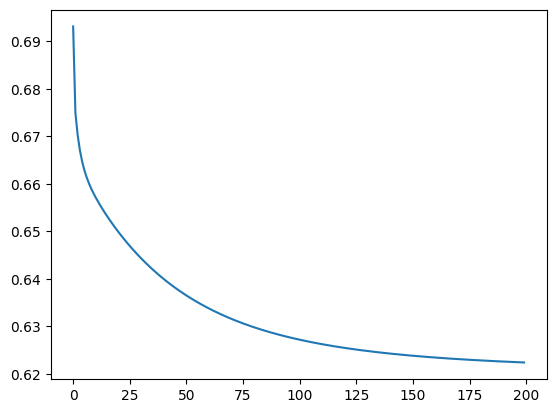

In [84]:
plt.plot(ll)